In [91]:
#import needed libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MeanShift,estimate_bandwidth,AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from bokeh.plotting import figure,show,output_notebook
# output_notebook()

%matplotlib inline

In [215]:
#import dataset
df = pd.read_csv('./custdata.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [216]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Normalize Columns that can be normalized

In [217]:
df['total'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']

In [218]:
#normalize Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen columns

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'total']
df_norm = df

df_norm.iloc[:,[2,3,4,5,6,7,8]] = normalize(df_norm.iloc[:,[2,3,4,5,6,7,8]])

### Fit kmeans with 3 central clusters to start off

In [219]:
km = KMeans(3)
km.fit(df_norm)

centers = km.cluster_centers_
centers


array([[ 1.        ,  3.        ,  0.3863588 ,  0.12494343,  0.14771313,
         0.11491976,  0.03117751,  0.04704127,  0.85215389],
       [ 1.17142857,  1.26666667,  0.33125665,  0.13178376,  0.18653034,
         0.11431689,  0.05404362,  0.03965651,  0.85758777],
       [ 2.        ,  2.84677419,  0.1848872 ,  0.1951628 ,  0.30027078,
         0.03188198,  0.13199113,  0.03437586,  0.87856976]])

In [220]:
labels = km.labels_
silhouette_score(df_norm,labels,metric='euclidean')

0.62159236726809064

### Silhouette score as a measure of number of clusters

In [221]:
#your code here:
scores = []
for k in range(2,16):
    km = KMeans(k)
    km.fit(df_norm)
    labels = km.labels_
    score = silhouette_score(df_norm,labels,metric='euclidean')
    scores.append(score)

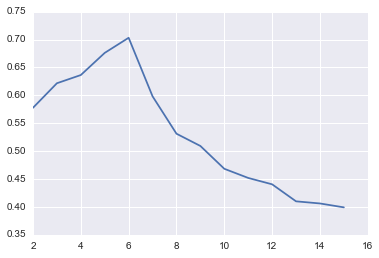

In [222]:
plt.plot(range(2,16),scores) #without reducing dimensions / features kmeans the ideal value for k would be 9.

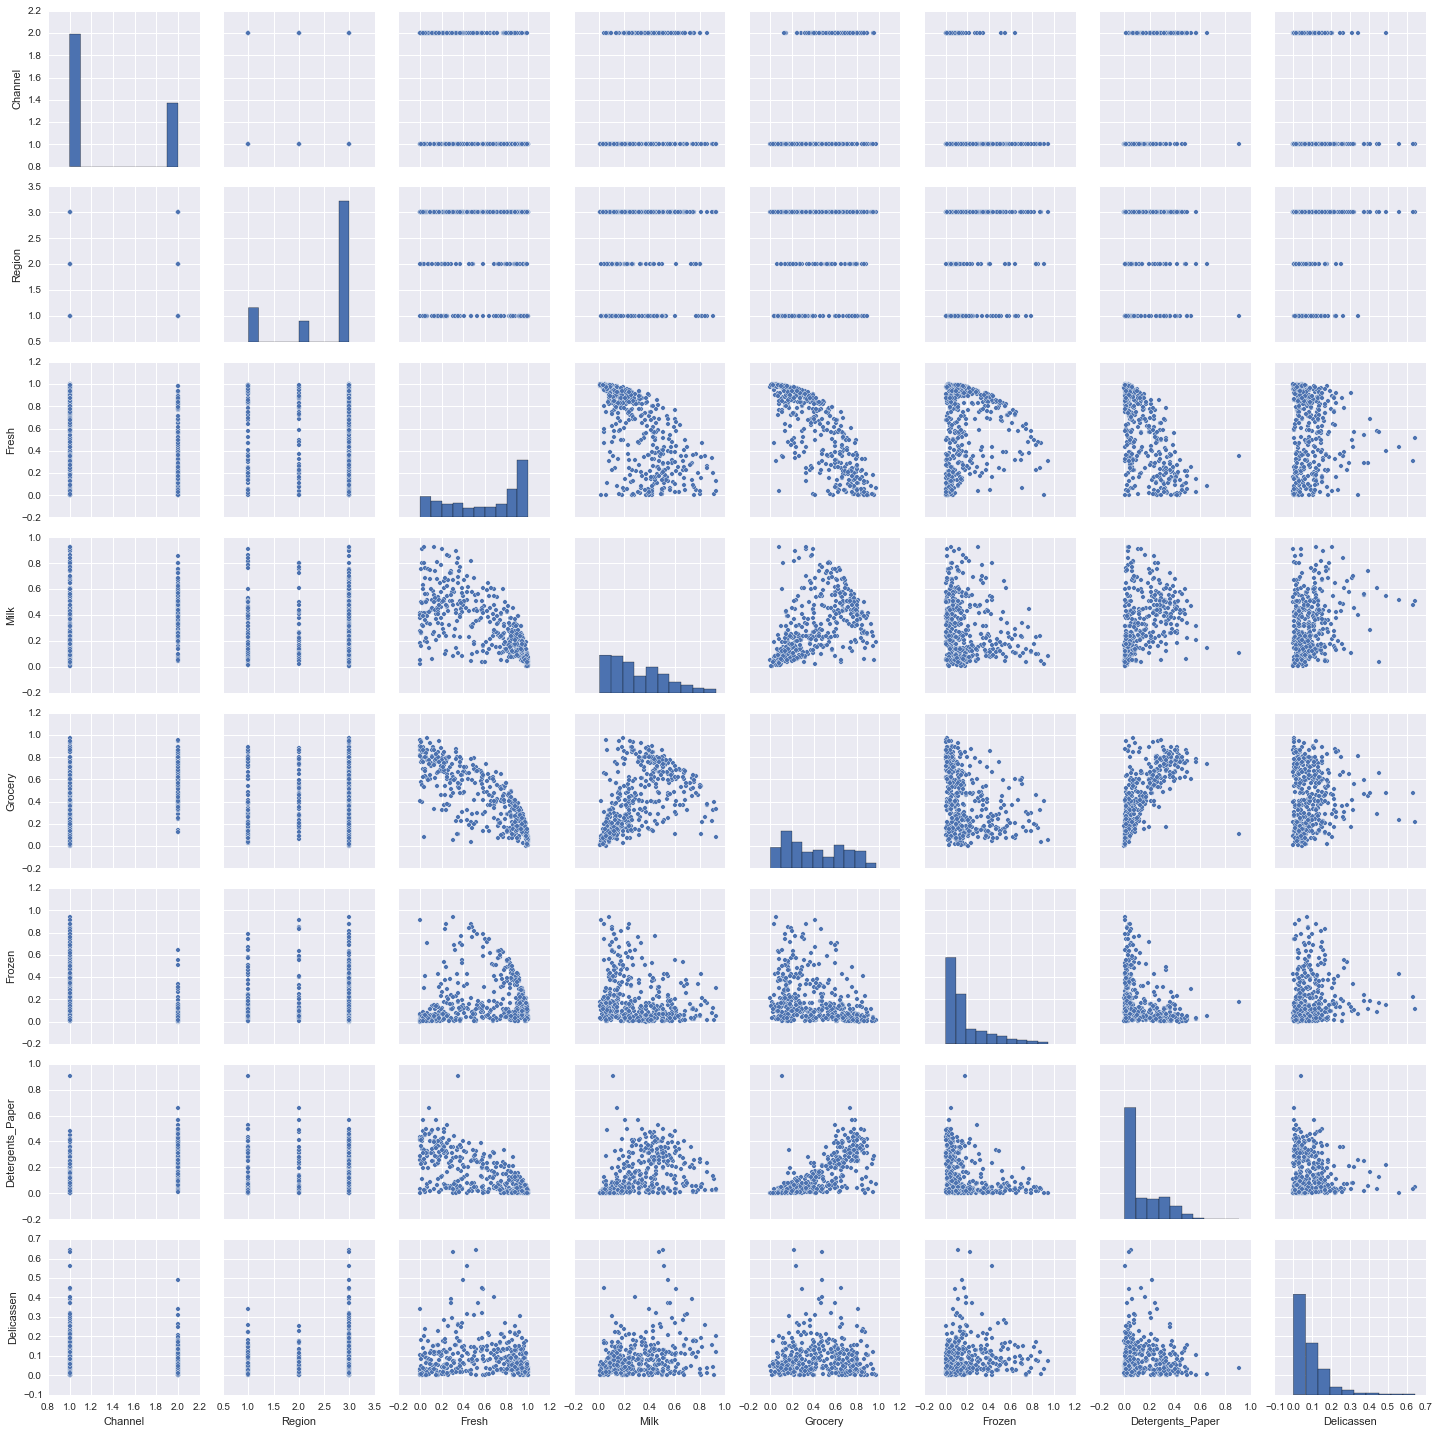

In [71]:
sns.pairplot(df)

In [191]:
df_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
0,2,3,0.328923,0.250697,0.196305,0.005556,0.069425,0.034738,0.885645
1,2,3,0.191267,0.265883,0.259324,0.047756,0.089251,0.048135,0.901616
2,2,3,0.158976,0.220410,0.192283,0.060182,0.087984,0.196287,0.916123
3,1,3,0.421719,0.038023,0.134193,0.203595,0.016118,0.056844,0.870493
4,2,3,0.430228,0.102920,0.136935,0.074479,0.033806,0.098639,0.877007


## Dimensionality Reduction using PCA

In [223]:
pca = PCA(n_components=3)
X_df = pca.fit(df_norm).transform(df_norm)

In [225]:
# Percentage of variance explained (first two components):
print "First component: " + str(pca.explained_variance_ratio_[0])
print "Second component: " + str(pca.explained_variance_ratio_[1])
print "third component: " + str(pca.explained_variance_ratio_[2])

First component: 0.66636327856
Second component: 0.267699993579
third component: 0.0425515085686


In [226]:
km = KMeans(6)
km.fit(X_df)

centers = km.cluster_centers_
centers

array([[-0.49768605, -0.67400751, -0.04478277],
       [ 1.56012768,  0.2444342 , -0.00433676],
       [-0.43613463,  0.36326641,  0.02311126],
       [ 0.56240362,  0.30304882,  0.02295514],
       [ 0.5005394 , -0.74102731, -0.03793104],
       [ 1.49868669, -0.81699383,  0.00886275]])

In [227]:
labels = km.labels_
silhouette_score(X_df,labels,metric='euclidean')

0.77538847510208764

In [228]:
scores = []
for k in range(2,16):
    km = KMeans(k)
    km.fit(X_df)
    labels = km.labels_
    score = silhouette_score(X_df,labels,metric='euclidean')
    scores.append(score)

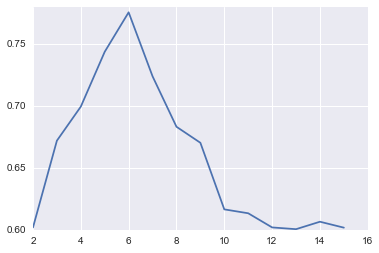

In [229]:
#6 clusters yields the best result

plt.plot(range(2,16),scores) #8 is optimal value for clusters

In [ ]:
p = figure(title="Clusters in dataset")

p.circle(x = X_df[:,0],y= X_df[:,1],size = 5)


p.circle(x= centers[:,0],y=centers[:,1],
        alpha=0.4,
        color='green',
        size=100)

show(p)

## Meanshift

In [230]:
bandwidth = estimate_bandwidth(X_df, quantile=0.3)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_df)

MeanShift(bandwidth=0.8365775735494243, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [231]:
labels = ms.labels_
silhouette_score(X_df,labels,metric='euclidean')

0.59183883086852385

In [ ]:
centers = ms.cluster_centers_

p = figure(title="Clusters in dataset")

p.circle(x = X_df[:,0],y= X_df[:,1],size = 5)


p.circle(x= centers[:,0],y=centers[:,1],
        alpha=0.4,
        color='green',
        size=100)

show(p)

## Agglomerative Clustering

In [232]:
ac = AgglomerativeClustering(6)
ac.fit(X_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=6, n_components=None,
            pooling_func=<function mean at 0x106445aa0>)

In [238]:
silhouette_score(X_df,ac.labels_,metric='euclidean') # yeilds exact result to Kmeans

0.77538847510208764

In [236]:
scores = []
for k in range(2,16):
    km = AgglomerativeClustering(k)
    km.fit(X_df)
    labels = km.labels_
    score = silhouette_score(X_df,labels,metric='euclidean')
    scores.append(score)

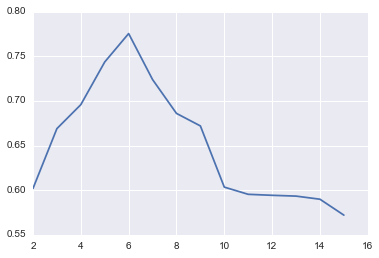

In [237]:
plt.plot(range(2,16),scores) #8 is optimal value for clusters